In [4]:
# importing required packages
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

### Loading data from _csv_ file into dataframe using pandas

In [5]:
df = pd.read_csv('creditcard.csv')

In [6]:
df.shape

(284807, 31)

### Getting a glimpse of the data

In [7]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df['hour'] = df['Time'].apply(lambda x: math.floor(x/3600))

### Droping duplicates
+ Duplicates in the data leads to false prediction
+ So, we should drop the duplicate rows from the dataframe

In [10]:
df.drop_duplicates(inplace=True)

### Cleaning the data

In [11]:
var = np.array(df.columns)

#### Checking the values of the attribute "class"

In [12]:
df_class = df['Class']
for i in range(len(df_class)):
    if(df_class.iloc[i]!=0 and df_class.iloc[i]!=1):
        print(i)
        break
print("Class column is clean")

Class column is clean


#### Checking the values of the attribute "Time"

In [13]:
df_time = df['Time']
for i in range(len(df_class)):
    if(df_class.iloc[i]<0):
        print(i)
        break
print("Time column is clean")

Time column is clean


#### Checking for missing values in the data

In [14]:
null = 0 # bool variable for checking missing values
for i in var: # checking for missing values in each column
    if(df.isna().sum() [i] !=0):
        null = 1
        print('Missing values in ',i)
if(null==0):
    print("There are no missing values in the data")

There are no missing values in the data


### Dividing the data into fraud and genuine cases based on "class" attribute

In [15]:
fraud = df.loc[df['Class']==1] # fraud dataframe contains data of transactions which are fraud
norm = df.loc[df['Class']==0] # norm dataframe contains data of transactions which are genuine

### Visualisation of data

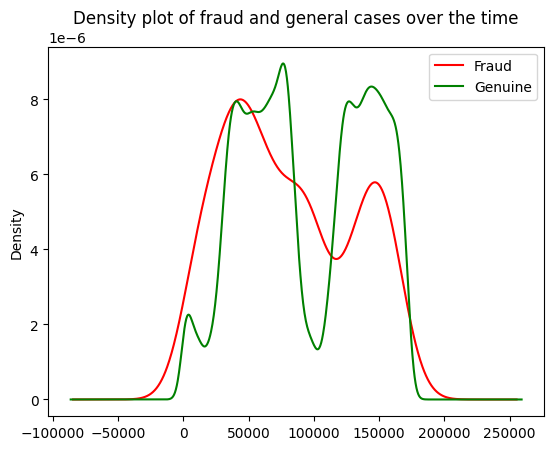

In [16]:
fraud['Time'].plot.kde(color = 'red',label='Fraud')
norm['Time'].plot.density(color = 'green',label='Genuine')
plt.legend()
plt.title('Density plot of fraud and general cases over the time')
plt.show()

## Probability Density of Fraud and Genuine transactions
+ We can observe that, the density of fraud cases is sometimes **higher than** that of Genuine cases 
+ Even though the number of fraud cases are **very few(~0.17%)**, the density is an intensive property
+ **Around T=100K**, we can see that the density of fraud cases **surpasses** Normal

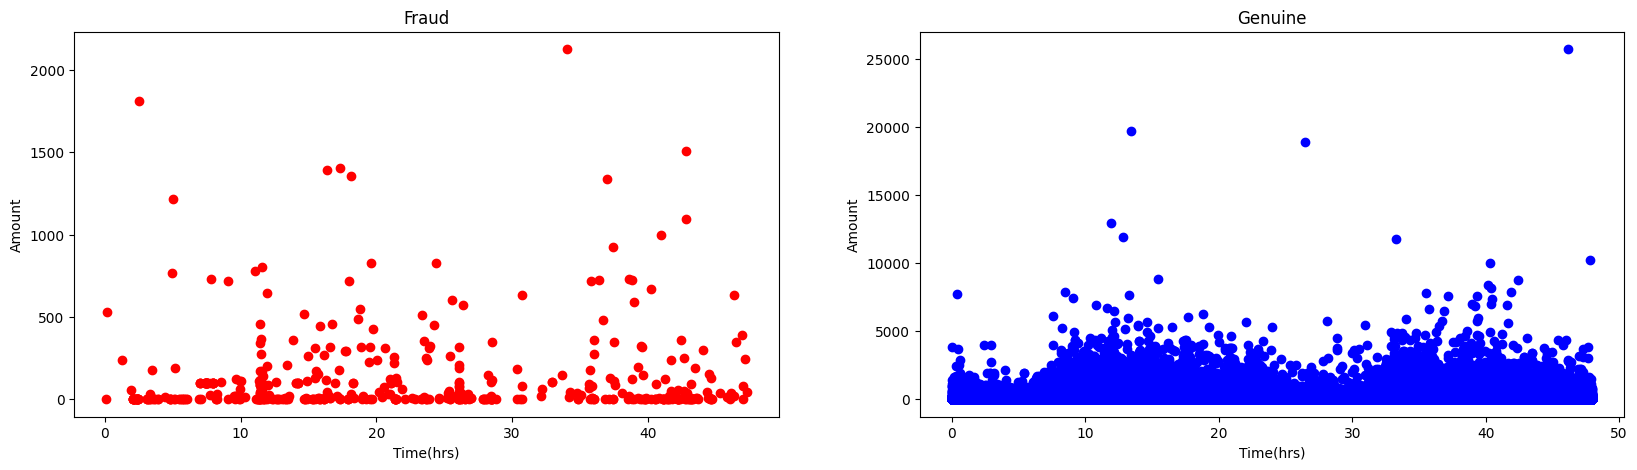

In [17]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].plot(fraud['Time'].to_numpy()/3600,fraud['Amount'].to_numpy(),'o',c='red')
ax[0].set_xlabel('Time(hrs)')
ax[0].set_title('Fraud')
ax[0].set_ylabel('Amount')
ax[1].plot(norm['Time'].to_numpy()/3600,norm['Amount'].to_numpy(),'o',c='blue')
ax[1].set_xlabel('Time(hrs)')
ax[1].set_ylabel('Amount')
ax[1].set_title('Genuine')
plt.show()

## Amount of money transfered in Fraud and Normal cases
+ In the majority of the fraud transactions, money tranfered is in b/w **0-500** 
+ While in the majority of the Genuine transactions, money tranfered is in b/w **0-5000**
+ By observation, when the amount of money transfered in **normal increases**, the amount of money transfered in **fraud also increases**

In [18]:
f1 = fraud
n1 = norm
f_count = pd.DataFrame(f1.groupby('hour').count())['Time']
n_count = pd.DataFrame(n1.groupby('hour').count())['Time']

In [19]:
l = []
for i in range(0,len(n_count)):
    l.append(i)
l = np.array(l)
g = []
for i in range(0,len(f_count)):
    g.append(i)
g = np.array(g)

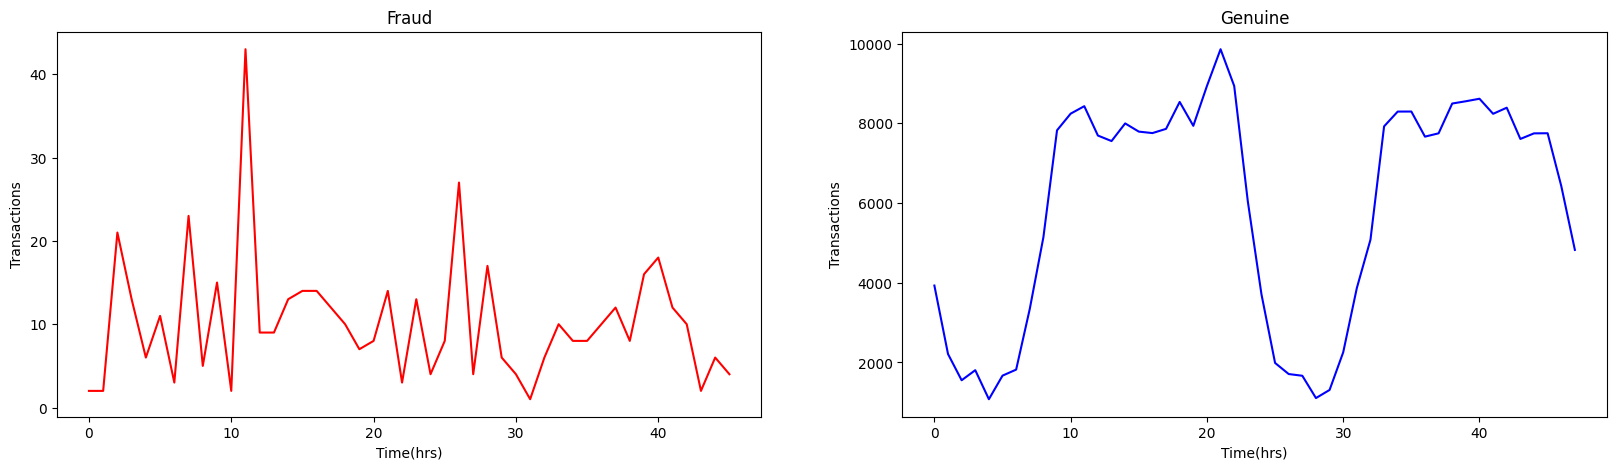

In [20]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].plot(g,f_count,c='red')
ax[0].set_xlabel('Time(hrs)')
ax[0].set_title('Fraud')
ax[0].set_ylabel('Transactions')
ax[1].plot(l,n_count,c='blue')
ax[1].set_xlabel('Time(hrs)')
ax[1].set_ylabel('Transactions')
ax[1].set_title('Genuine')
plt.show()

### Number of transactions v/s Time
+ We can observe that around __t=11__, number of fraud transactions are max
+ Also, around __t=20__, fraud transactions are min. and genuine transactions are max.

### Checking for Data imbalance

In [21]:
fr = len(fraud)
nr = len(norm)
print(nr/fr)

598.8435517970402


+ We can observe that, number of genuine cases are __600__ times fraud cases
+ This causes imbalance in the data, we need to __balance__ the data before applying any model to it

# Balancing Methods

## UnderSampling

In [22]:
df1 = norm.sample(len(fraud))
df2 = fraud
final = pd.concat([df1,df2],axis=0)

In [23]:
y = final['Class']
X = final.drop('Class',axis=1)

In [24]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X,y,cv=10).mean()

0.9290929451287793

In [25]:
cross_val_score(SVC(),X,y,cv=10).mean()

0.47068309070548714

In [26]:
cross_val_score(RandomForestClassifier(n_estimators=40), X, y,cv=10).mean()

0.9270660694288914

+ By using this method, we are __*losing*__ so much data
+ So, this method can't be used in all times
+ Can we create extra data for the __"minor"(*fraud*)__ class?

## OverSampling

In [27]:
df1 = norm
df2 = fraud.sample(len(norm),replace=True)
final = pd.concat([df1,df2],axis=0)

In [28]:
y = final['Class']
X = final.drop('Class',axis=1)

# PCA

In [29]:
X_data = X.drop(['Time','Amount','hour'],axis = 1)
X_data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [30]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_data)
X_pca.shape

(566506, 10)

In [31]:
X_dat_pca = pd.DataFrame(X_pca)

In [32]:
pca.explained_variance_ratio_

array([0.69837825, 0.09417672, 0.06633328, 0.04060733, 0.01378958,
       0.01263312, 0.00884595, 0.007984  , 0.00710829, 0.00568008])

In [43]:
X_dat_pca

,0,1,2,3,4,5,6,7,8,9
0,-9.120713,1.199290,-0.392646,-1.653624,0.783911,0.182612,1.221742,-1.347009,-1.409259,0.180157
1,-9.140926,0.978106,-0.414933,-0.493855,-1.025303,-0.102143,-0.470579,-0.315110,0.320985,-0.608073
2,-9.212779,1.098341,-0.431776,-1.719250,0.535376,0.304518,2.304149,-0.207277,-0.918226,-0.161623
3,-9.268023,1.372285,-0.626658,-1.713931,0.053979,-0.023671,0.424361,-0.295147,-1.863018,-0.269302
4,-9.086778,1.511087,-0.728858,-1.498644,0.493938,-0.762072,0.727352,-0.980869,-1.254221,0.219645
...,...,...,...,...,...,...,...,...,...,...
566501,37.703318,-0.844111,-7.186912,-3.596145,-0.913395,-0.351818,1.355214,-0.577674,-0.917025,-2.463675
566502,0.068637,-2.249957,0.261187,-3.598019,0.601580,-0.366677,-0.217548,-0.320112,-1.778184,0.411133
566503,7.716051,-4.467247,1.756622,1.268257,2.341681,-1.883236,-0.491897,2.147503,-0.066207,3.496914
566504,0.877673,-0.036027,2.283378,-2.585168,-0.460044,-0.445802,-1.036514,2.970205,-1.835293,-0.386024


In [48]:
X_new = pd.DataFrame(X['Time'])

In [58]:
X = X.reset_index(drop=True)

In [59]:
X_dat_pca['Time'] = X['Time']

In [60]:
X_dat_pca['Amount'] = X['Amount']

In [61]:
X_dat_pca.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Time', 'Amount'], dtype='object')

In [64]:
X = X_dat_pca

In [73]:
X.columns = X.columns.astype(str)

### SMOTE

In [75]:
smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y)

In [76]:
y_sm.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [77]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X_sm,y_sm,cv=3).mean()

0.9043699447463275

# MODELS

### Randomforest

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y)

In [79]:
model = RandomForestClassifier(n_estimators=40).fit(X_train,y_train)

In [80]:
model.score(X_test,y_test)

0.9999470441828034

### Decision Tree

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y)

In [82]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
model.score(X_test,y_test)

0.9997970027007467

### Model Selection
+ We can observe that, among the models Randomforest and DesicionTree are better than the other models
+ The **score** can be slightly changed by altering the parameters of the model

###